In [38]:
def covariance(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum = 0
    for i in range(0, len(x)):
        sum += ((x[i] - x_bar) * (y[i] - y_bar))
    return sum/(len(x)-1)

In [39]:
ls_x = np.array([1, 2, 3, 4])
ls_y = np.array([1, 1, 2, 3])

print(covariance(ls_x, ls_y))

1.1666666666666667


In [17]:
np.cov(ls_x, ls_y)

array([[1.66666667, 1.16666667],
       [1.16666667, 0.91666667]])

In [29]:
A = np.array([[2, 0], [1, 5]])
V = np.array([3, 4])
np.dot(A, V)

array([ 6, 23])

In [ ]:
# Eigan value and vectors

In [40]:
eig_value, eig_vector = np.linalg.eig(A)

In [41]:
print(eig_value)
print(eig_vector)

[5. 2.]
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


In [44]:
print(np.dot(A, eig_vector[:, 0]))

[0. 5.]


In [46]:
eig_value[0]*eig_vector[:, 0]

array([0., 5.])

In [45]:
print(np.dot(A, eig_vector[:, 1]))

[ 1.8973666  -0.63245553]


In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# use pandas to read in the excel spreadsheet
df = pd.read_excel('Notebooks/Datasets/pca_uk.xlsx')

# build a matrix of the feature values, not including the text labels
X = np.array([df[i].values for i in df.columns if i != 'Features'])

print(X)

# calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(X)

print(X_r)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


In [4]:
df.head(17)

,England,N Ireland,Scotland,Wales,Features
0,375,135,458,475,Alcoholic drinks
1,57,47,53,73,Beverages
2,245,267,242,227,Carcase meat
3,1472,1494,1462,1582,Cereals
4,105,66,103,103,Cheese
5,54,41,62,64,Confectionery
6,193,209,184,235,Fats and oils
7,147,93,122,160,Fish
8,1102,674,957,1137,Fresh fruit
9,720,1033,566,874,Fresh potatoes


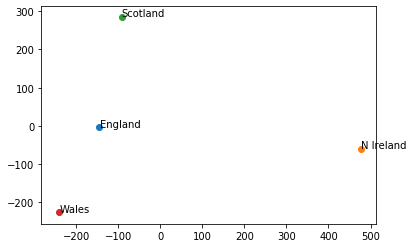

In [6]:
# Lets visualize the principle components

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

plt.show()

In [7]:
# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
[105073.34576714  45261.62487597]
[0.67444346 0.29052475]
[0.67444346 0.96496821]


In [34]:
import scipy
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(0.0, 1.0)


In [22]:
def reverse(lis):
    return lis[::-1]

In [23]:
test = [1,2,3]
reverse(test)

[3, 2, 1]

In [118]:
X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])

In [126]:
from sklearn.decomposition import PCA
import scipy

def PCA_calc(data, comp=2):
    X_mean = np.mean(data, axis=0)
    
    centered = data - X_mean
    covariance = np.cov(centered.T)
    
    eig_value, eig_vector = np.linalg.eig(covariance)
    
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] 
    idx_top2 = idx[:comp]
    
    eig_vector = eig_vector[:, idx_top2]
    PCA = np.dot(centered, eig_vector)
    return PCA
    
    

In [127]:
print(PCA_calculation(X))

[[0.         0.         0.        ]
 [0.         1.66666667 1.16666667]
 [0.         1.16666667 0.91666667]]
[[ 1.65392786 -0.2775295 ]
 [ 0.84584087  0.31153366]
 [-0.55130929  0.09250983]
 [-1.94845944 -0.126514  ]]


In [123]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston = load_boston()
bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [130]:
X2 = bos[bos.columns[:13]]
Y2 = bos['PRICE']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.25, random_state=0)

In [149]:
#number of components needed
my_model = PCA(n_components=(13))
my_model.fit_transform(X2_train)
my_model.explained_variance_ratio_.cumsum()

array([0.81172669, 0.96886707, 0.99041873, 0.99723451, 0.9984888 ,
       0.99922282, 0.99963292, 0.99987657, 0.99996379, 0.99999222,
       0.99999843, 0.99999993, 1.        ])

In [172]:
pca = PCA(n_components=8)
X_train_reduced = pca.fit_transform(X2_train)

In [173]:
#fit linear regression model
bos_model = LinearRegression()
bos_model.fit(X_train_reduced, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
X_test_reduced_scaled = pca.transform(X2_test)

In [175]:
#use linear regression predict
y_pred = bos_model.predict(X_test_reduced_scaled)

In [176]:
print(y_pred)

[21.32568802 25.24804801 27.29658333 14.77500106 20.38922631 25.22463041
 20.57917534 26.37249599 20.17254619 22.75581766  9.94755776 12.8788884
 17.37618296  7.2329778  33.56406886 29.3040924  21.99969855 32.26757669
 27.21839921 24.79665928 26.85896764 23.88255915 20.93290972 28.55367572
 23.41934155 20.34322128 22.52180963 20.17910858 30.76198602 18.50803342
 17.20293649 19.66134943 26.76605912 24.86643896 27.28446669 20.00150616
  8.67107348 25.10218525 15.69677669 11.57605886 23.52384012 19.78417683
 20.66792992 16.95647814 22.47516307 27.1103556  19.4849302  20.94941713
  8.26156587 24.8999023  19.02732717 14.15861015 24.19512323 28.24205933
 17.58510025 18.74977869 21.40203575 19.77121741 20.77115923 20.4624672
 24.83246694 21.84752303 28.68989458 28.34016018 17.35683081 28.57269637
 17.77080787 18.137655   14.80755363 21.62370007 22.11282522 22.92429774
 30.74336876 29.44373785 25.46468623  3.25217884 31.58016708 23.56897454
 25.91239814 20.19599032 27.92673571 20.74022907 22.5

In [177]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Obtaining the MSE and R2 Score
print(f'MSE: {mean_squared_error(Y_test, y_pred)}')
print(f'R2 Score: {r2_score(Y_test, y_pred)}')

MSE: 40.438064973538374
R2 Score: 0.5050360796059916
